# Holt-Winters法による予測

In [2]:
# ブログ掲載 https://datapowernow.hatenablog.com/entry/2021/06/03/151206
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='MS Gothic'

In [3]:
# データの読み込み
wage = pd.read_pickle('wage_index.pkl')
wage.head()

,w_index
yr_month,
1970-01-01,14.2
1970-02-01,13.8
1970-03-01,15.7
1970-04-01,14.9
1970-05-01,15.1


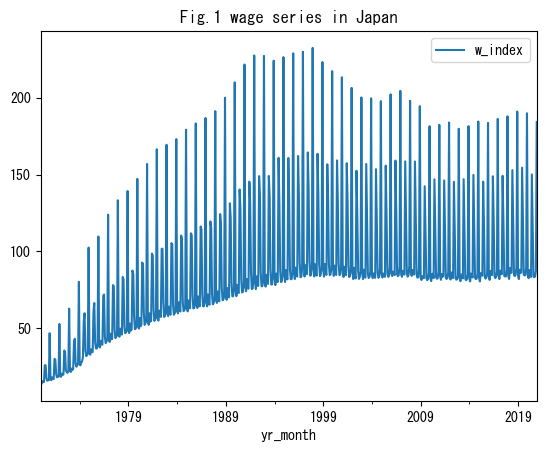

In [4]:
# 系列のプロット (Fig.1)
wage.plot(title='Fig.1 wage series in Japan').autoscale(axis='x',tight=True) 

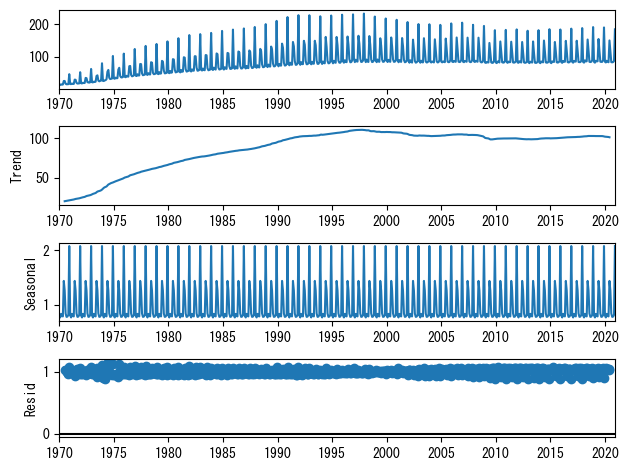

In [5]:
# トレンド・季節変動・その他に分解 (Fig.2)
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_result = seasonal_decompose(wage,model='multiplicative')
decompose_result.plot();
span=12; alpha=2/(span+1); wage.index.freq='MS'

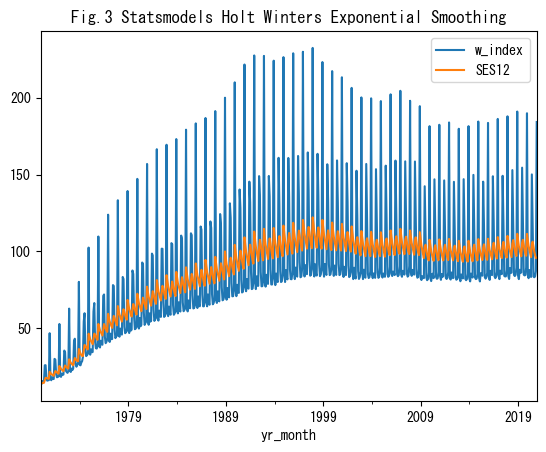

In [6]:
# 単純指数平滑法 (Fig.3)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
wage['SES12'] = SimpleExpSmoothing(wage).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
wage[['w_index','SES12']].plot(title='Fig.3 Statsmodels Holt Winters Exponential Smoothing')
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Fig.4 Statsmodels Holt Winters Exponential Smoothing'}, xlabel='yr_month'>

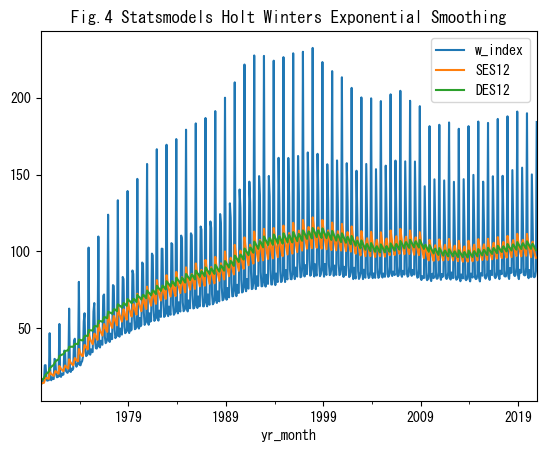

In [7]:
# 二重指数平滑法 (Fig.4)
wage['DES12'] = ExponentialSmoothing(wage['w_index'],trend='mul').fit().fittedvalues.shift(-1) 
wage[['w_index','SES12','DES12']].plot(title='Fig.4 Statsmodels Holt Winters Exponential Smoothing')

<AxesSubplot:title={'center':'Fig.5 Statsmodels Holt Winters Exponential Smoothing'}, xlabel='yr_month'>

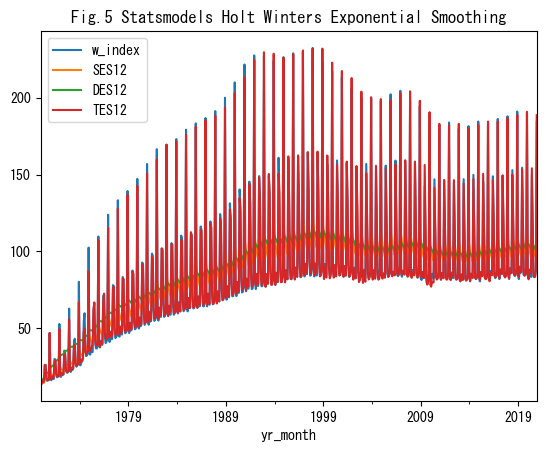

In [8]:
# 三重指数平滑法 (Fig.5)
wage['TES12'] = ExponentialSmoothing(wage['w_index'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues 
wage[['w_index','SES12','DES12','TES12']].plot(title='Fig.5 Statsmodels Holt Winters Exponential Smoothing')

<AxesSubplot:title={'center':'Fig.6 Statsmodels Holt Winters Exponential Smoothing'}, xlabel='yr_month'>

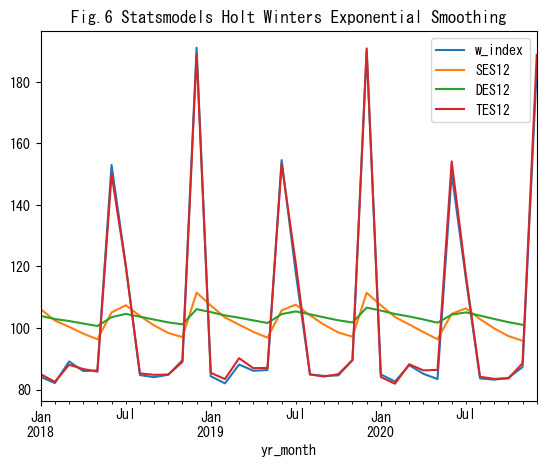

In [9]:
# 直近のみ (Fig.6)
wage[['w_index','SES12','DES12','TES12']].iloc[-36:].plot(title='Fig.6 Statsmodels Holt Winters Exponential Smoothing') 

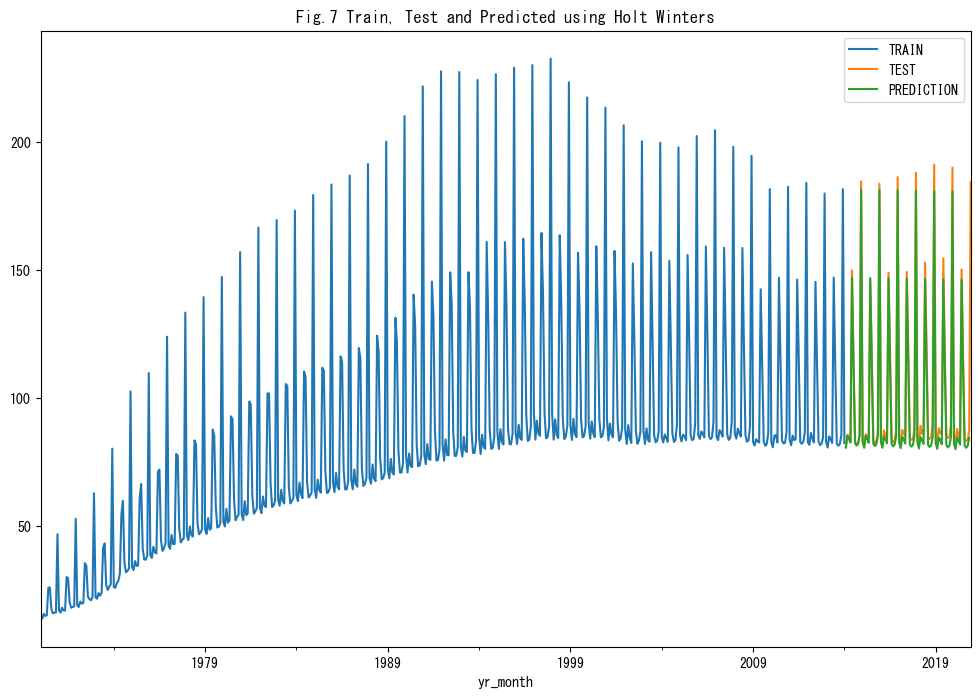

In [10]:
# Holt-Winters 法による予測
wage = pd.read_pickle('wage_index.pkl'); wage.index.freq = 'MS' # 検証のため、再度データを読み込み
train_wage=wage[:529]; test_wage=wage[529:] # 訓練データとテストデータに分離
fitted_model = ExponentialSmoothing(train_wage['w_index'],trend='add',seasonal='add',seasonal_periods=12).fit() # 訓練
test_predictions = fitted_model.forecast(82).rename('HW Test Forecast') # テスト期間の予測値
train_wage['w_index'].plot(legend=True,label='TRAIN')
test_wage['w_index'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION',figsize=(12,8))
plt.title('Fig.7 Train, Test and Predicted using Holt Winters'); # 実績値と予測値のプロット (Fig.7)